In [1]:
import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import soundfile as sf
import warnings


In [2]:
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
# Load audio file
def load_audio(file_path):
    """
    Load an audio file and return the audio time series and sampling rate.

    Parameters:
    - file_path: str, path to the audio file.

    Returns:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    """
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

In [4]:
# Visualize waveform
def plot_waveform(y, sr):
    plt.figure(figsize=(14, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

In [5]:
# Visualize spectrogram
def plot_spectrogram(y, sr):
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.title('Spectrogram')
    plt.show()

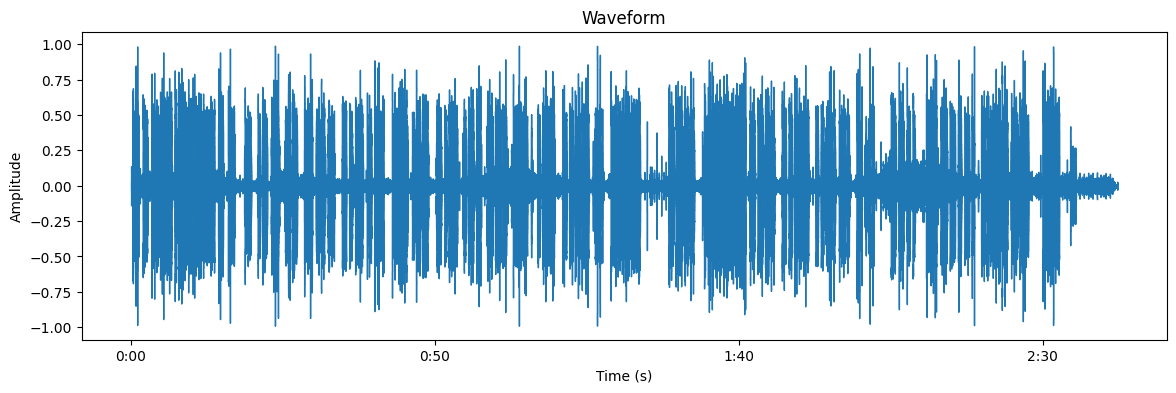

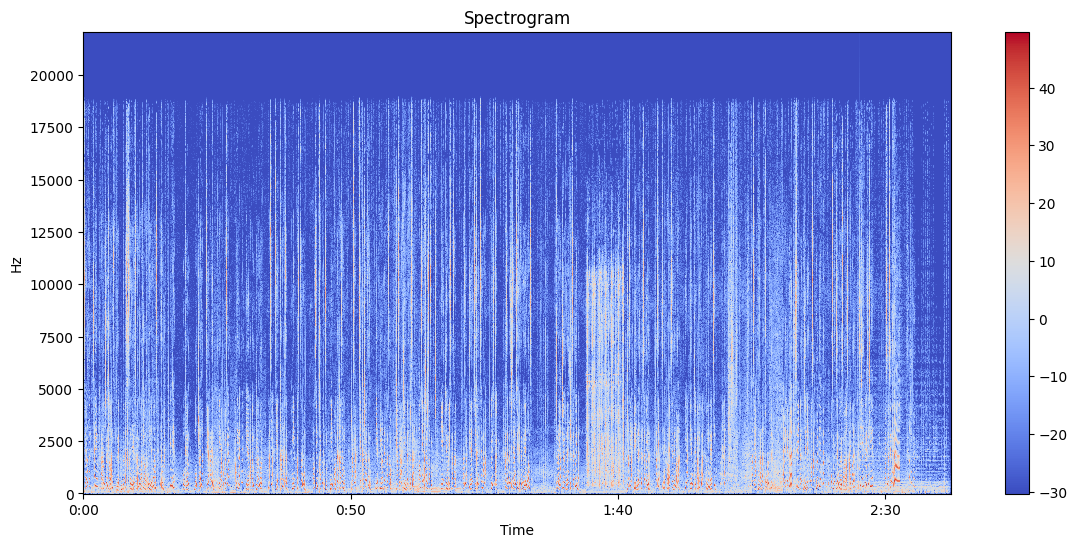

In [6]:
# Load and plot
file_path = r'C:\Users\syrym\Downloads\research_2\audio.wav'
y, sr = load_audio(file_path)
plot_waveform(y, sr)
plot_spectrogram(y, sr)

In [7]:
def extract_pitch(y, sr, fmin=50, fmax=300):
    """
    Extract the fundamental frequency (F0) using the autocorrelation method.

    Parameters:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    - fmin: float, minimum frequency to consider (Hz).
    - fmax: float, maximum frequency to consider (Hz).

    Returns:
    - pitches: np.ndarray, pitch (F0) values over time.
    - times: np.ndarray, time stamps.
    """
    pitches, magnitudes = librosa.piptrack(y=y, sr=sr, fmin=fmin, fmax=fmax)
    pitch_values = []
    times = []

    for i in range(pitches.shape[1]):
        pitch = pitches[:, i]
        mag = magnitudes[:, i]
        index = mag.argmax()
        pitch_freq = pitch[index]
        pitch_values.append(pitch_freq)
        times.append(i * (512 / sr))  # Assuming default hop_length=512

    pitches = np.array(pitch_values)
    times = np.array(times)
    return pitches, times

# Extract pitch
pitches, times = extract_pitch(y, sr)


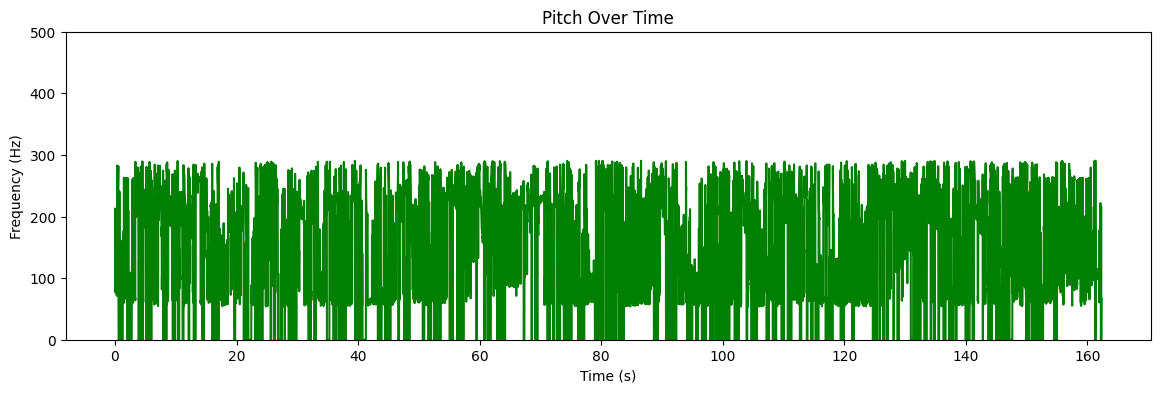

In [8]:
def plot_pitch(pitches, times):
    plt.figure(figsize=(14, 4))
    plt.plot(times, pitches, color='g')
    plt.title('Pitch Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Frequency (Hz)')
    plt.ylim(0, 500)
    plt.show()

plot_pitch(pitches, times)


In [9]:
def classify_gender(pitches):
    """
    Classify gender based on average pitch.

    Parameters:
    - pitches: np.ndarray, array of pitch (F0) values.

    Returns:
    - str, predicted gender ('Male' or 'Female').
    """
    # Remove zero and NaN values
    pitches = pitches[(pitches > 0) & (~np.isnan(pitches))]
    avg_pitch = np.mean(pitches)
    print(f"Average Pitch: {avg_pitch:.2f} Hz")

    # Threshold for classification
    threshold = 165  # Hz

    if avg_pitch > threshold:
        return 'Female'
    else:
        return 'Male'

predicted_gender = classify_gender(pitches)
print(f"Predicted Gender: {predicted_gender}")


Average Pitch: 165.22 Hz
Predicted Gender: Female


In [10]:
def extract_mfccs(y, sr, n_mfcc=13):
    """
    Extract MFCCs from the audio signal.

    Parameters:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    - n_mfcc: int, number of MFCCs to extract.

    Returns:
    - mfccs: np.ndarray, MFCC feature matrix.
    """
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

mfccs = extract_mfccs(y, sr)
print(f"MFCCs shape: {mfccs.shape}")


MFCCs shape: (13, 13981)


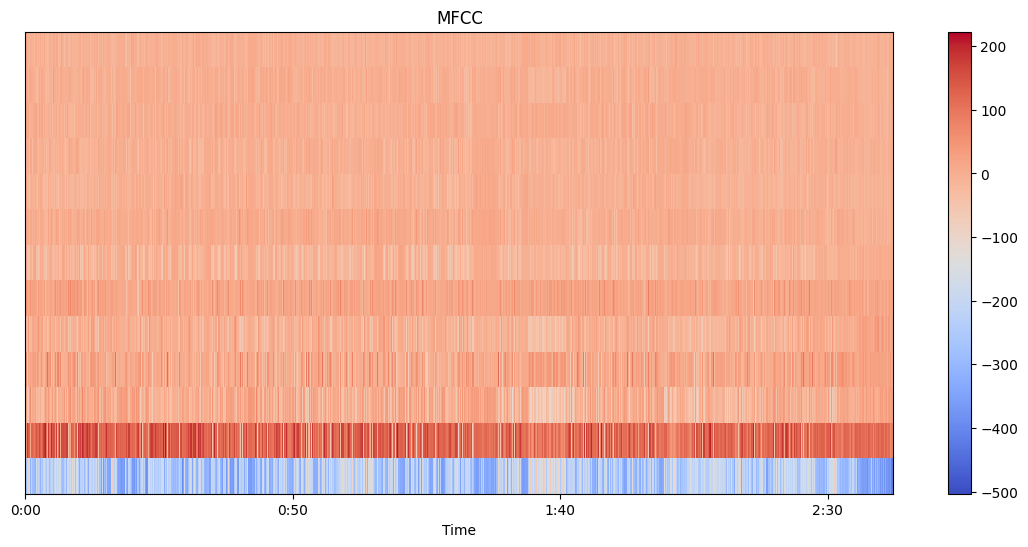

In [11]:
def plot_mfccs(mfccs):
    plt.figure(figsize=(14, 6))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title('MFCC')
    plt.show()

plot_mfccs(mfccs)


In [42]:
import numpy as np
import librosa
import os

# Load audio file
def load_audio(file_path):
    """
    Load an audio file and return the audio time series and sampling rate.

    Parameters:
    - file_path: str, path to the audio file.

    Returns:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    """
    y, sr = librosa.load(file_path, sr=None)
    return y, sr

# Extract MFCC features
def extract_mfccs(y, sr, n_mfcc=13):
    """
    Extract Mel-frequency cepstral coefficients (MFCCs) from the audio signal.

    Parameters:
    - y: np.ndarray, audio time series.
    - sr: int, sampling rate.
    - n_mfcc: int, number of MFCC coefficients to extract.

    Returns:
    - mfccs: np.ndarray, MFCC feature matrix.
    """
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    return mfccs

# Load and preprocess dataset
def load_dataset():
    """
    Load and preprocess the dataset by extracting MFCC features from audio files.

    Returns:
    - X: np.ndarray, feature matrix (MFCCs).
    - y: np.ndarray, labels (0 for male, 1 for female).
    """
    X = []
    y = []

    # Audio file paths (ensure these files exist)
    audio_files = [
        r"C:\Users\syrym\Downloads\research_2\audio_samples\male_speaker.wav",
        r"C:\Users\syrym\Downloads\research_2\audio_samples\female_speaker.wav",
    ]
    
    # Labels: 0 for male, 1 for female
    labels = [0, 1]

    for file_path, label in zip(audio_files, labels):
        if not os.path.exists(file_path):
            print(f"File not found: {file_path}")
            continue

        # Load the audio file
        y_i, sr_i = load_audio(file_path)
        
        # Extract MFCCs and compute their mean over time
        mfccs_i = extract_mfccs(y_i, sr_i)
        mfccs_mean = np.mean(mfccs_i, axis=1)  # Average MFCCs over time

        X.append(mfccs_mean)
        y.append(label)

    # Convert to numpy arrays
    X = np.array(X)
    y = np.array(y)
    return X, y

# Load dataset
X, y = load_dataset()
print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")



Feature matrix shape: (2, 13)
Labels shape: (2,)


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Scale features
def scale_features(X):
    """
    Standardize features by removing the mean and scaling to unit variance.

    Returns:
    - X_scaled: np.ndarray, scaled feature matrix.
    """
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled

# Train model
def train_model(X_scaled, y):
    """
    Train a logistic regression classifier on the entire dataset.

    Parameters:
    - X_scaled: np.ndarray, scaled feature matrix.
    - y: np.ndarray, labels.

    Returns:
    - model: trained model
    """
    model = LogisticRegression()
    model.fit(X_scaled, y)
    return model

# Evaluate model
def evaluate_model(model, X_scaled, y):
    """
    Evaluate the model on the entire dataset.

    Parameters:
    - model: trained logistic regression model.
    - X_scaled: np.ndarray, scaled feature matrix.
    - y: np.ndarray, labels.

    Returns:
    - None, prints the model performance.
    """
    y_pred = model.predict(X_scaled)
    accuracy = (y == y_pred).mean() * 100
    print(f"Accuracy on the entire dataset: {accuracy:.2f}%")

# Run the pipeline without cross-validation
X_scaled = scale_features(X)
model = train_model(X_scaled, y)
evaluate_model(model, X_scaled, y)


Accuracy on the entire dataset: 100.00%


In [47]:
from sklearn.preprocessing import StandardScaler

# Assume X contains your training data features
# Fit the scaler using your training data (X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform training data

# Convert the audio data to floating-point format
y = y.astype(np.float32)

# Extract MFCCs from your audio file
mfccs_your_audio = extract_mfccs(y, sr)
mfccs_your_audio_mean = np.mean(mfccs_your_audio, axis=1).reshape(1, -1)

# Scale features using the same scaler from training
mfccs_your_audio_scaled = scaler.transform(mfccs_your_audio_mean)

# Predict gender
gender_pred = model.predict(mfccs_your_audio_scaled)
gender_label = 'Female' if gender_pred[0] == 1 else 'Male'
print(f"The predicted gender is: {gender_label}")


The predicted gender is: Female
